# Zomato_Sales_Analysis_EDA

In [2]:
# Objective:
# To conduct a comprehensive sales analysis 
# And to identify the primary revenue streams for Zomato, providing insights into the factors driving its business growth and profitability.

In [7]:
#importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
#Loading/ Reading the Data from csv file - source - Kaggle

data = pd.read_csv('hyderabad_zomato_data.csv')

df = pd.DataFrame(data)

# Exploring the Dataset

In [9]:
# Step 1: Exploring the Dataset - Performed an initial exploration to understand the structure and content


#displaying top 5 rows

df.head()

,Order_ID,Order_Date,Order_Value,Restaurant_ID,Restaurant_Name,Cuisine_Type,Restaurant_Rating,Delivery_Fee,Delivery_Partner_Payment,Subscription_Type,Customer_ID,Customer_Location,Quantity,Customer_Rating,Restaurant_Promotion
0,2183821,2025-01-05,4449,73243902,Chutneys,Irani Chai,3.8,107,66,Zomato Pro,63798420,Gachibowli,5,4,Yes
1,5722187,2025-01-08,4873,66892788,Bawarchi,Chinese,3.9,74,76,Zomato Pro,95749000,Gachibowli,4,3,Yes
2,9879001,2025-01-07,3422,48407280,Bikanervala,Andhra Cuisine,4.2,58,35,Zomato Gold,34158502,Kukatpally,5,1,No
3,9172757,2025-01-29,1400,25045036,Hotel Shadab,Chinese,4.9,65,59,Zomato Pro,41629179,Jubilee Hills,5,1,No
4,1462106,2025-01-04,2028,77872502,Sarvi Restaurant,Haleem,4.5,54,35,Zomato Gold,16635154,Kukatpally,4,2,No


In [41]:
df.info() # provides a summary of the dataset, including the number of non-null values, data types of each column, and the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Order_ID                  1000 non-null   int64         
 1   Order_Date                1000 non-null   datetime64[ns]
 2   Order_Value               1000 non-null   int64         
 3   Restaurant_ID             1000 non-null   int64         
 4   Restaurant_Name           1000 non-null   object        
 5   Cuisine_Type              1000 non-null   object        
 6   Restaurant_Rating         1000 non-null   float64       
 7   Delivery_Fee              1000 non-null   int64         
 8   Delivery_Partner_Payment  1000 non-null   int64         
 9   Subscription_Type         1000 non-null   object        
 10  Customer_ID               1000 non-null   int64         
 11  Customer_Location         1000 non-null   object        
 12  Quantity             

Index(['Order_ID', 'Order_Date', 'Order_Value', 'Restaurant_ID',
       'Restaurant_Name', 'Cuisine_Type', 'Restaurant_Rating', 'Delivery_Fee',
       'Delivery_Partner_Payment', 'Subscription_Type', 'Customer_ID',
       'Customer_Location', 'Quantity', 'Customer_Rating',
       'Restaurant_Promotion'],
      dtype='object')

In [44]:
df.shape #Number of rows and columns

(1000, 15)

In [70]:
df.describe().style.background_gradient(cmap="Wistia")

,Order_ID,Order_Date,Order_Value,Restaurant_ID,Restaurant_Rating,Delivery_Fee,Delivery_Partner_Payment,Customer_ID,Quantity,Customer_Rating
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5484232.794000,2024-01-15 23:24:00,2585.713000,53023066.839000,3.746100,91.488000,59.104000,54320914.531000,3.019000,2.990000
min,1000900.000000,2024-01-01 00:00:00,203.000000,10264393.000000,2.500000,30.000000,20.000000,10008514.000000,1.000000,1.000000
25%,3218233.500000,2024-01-08 00:00:00,1360.500000,31480671.500000,3.100000,60.000000,39.000000,32239670.250000,2.000000,2.000000
50%,5461558.000000,2024-01-16 00:00:00,2539.000000,51372075.500000,3.800000,93.000000,58.000000,54050635.000000,3.000000,3.000000
75%,7736079.250000,2024-01-24 00:00:00,3806.250000,74165329.500000,4.400000,123.000000,79.000000,76014792.250000,4.000000,4.000000
max,9985674.000000,2024-01-31 00:00:00,4994.000000,99918945.000000,5.000000,150.000000,100.000000,99950689.000000,5.000000,5.000000
std,2635484.870331,nan,1400.168222,25772273.415614,0.737203,35.201065,23.271845,26086323.153799,1.411606,1.405659


In [32]:
df.dtypes

Order_ID                     object
Order_Date                   object
Order_Value                   int64
Restaurant_ID                object
Restaurant_Name              object
Cuisine_Type                 object
Restaurant_Rating           float64
Delivery_Fee                  int64
Delivery_Partner_Payment      int64
Subscription_Type            object
Customer_ID                  object
Customer_Location            object
Quantity                      int64
Customer_Rating               int64
Restaurant_Promotion         object
dtype: object

In [34]:
df['Restaurant_Name'].value_counts()  

Restaurant_Name
Bawarchi            143
Bikanervala         137
Hotel Shadab        126
Chutneys            125
Paradise            122
Shilparamam         119
Sarvi Restaurant    117
Pista House         111
Name: count, dtype: int64

In [35]:
#since date column is not in datetime type - converted the Order_Date column to a datetime type to perform any date-related operations.

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Order_Date']

#chck the datatype of date column now

df.dtypes

Order_ID                             int64
Order_Date                  datetime64[ns]
Order_Value                          int64
Restaurant_ID                        int64
Restaurant_Name                     object
Cuisine_Type                        object
Restaurant_Rating                  float64
Delivery_Fee                         int64
Delivery_Partner_Payment             int64
Subscription_Type                   object
Customer_ID                          int64
Customer_Location                   object
Quantity                             int64
Customer_Rating                      int64
Restaurant_Promotion                object
dtype: object

In [36]:
#since rating column is in int I am changing to float, as ratings might be in decimals like 4.5 etc

df['Customer_Rating'] = df['Customer_Rating'].astype(float)

df.dtypes

Order_ID                             int64
Order_Date                  datetime64[ns]
Order_Value                          int64
Restaurant_ID                        int64
Restaurant_Name                     object
Cuisine_Type                        object
Restaurant_Rating                  float64
Delivery_Fee                         int64
Delivery_Partner_Payment             int64
Subscription_Type                   object
Customer_ID                          int64
Customer_Location                   object
Quantity                             int64
Customer_Rating                    float64
Restaurant_Promotion                object
dtype: object

In [37]:
#step 2: Check for missing Values - 

df.isnull().sum()

#since all the values are 0, my dataset contains no missing values

Order_ID                    0
Order_Date                  0
Order_Value                 0
Restaurant_ID               0
Restaurant_Name             0
Cuisine_Type                0
Restaurant_Rating           0
Delivery_Fee                0
Delivery_Partner_Payment    0
Subscription_Type           0
Customer_ID                 0
Customer_Location           0
Quantity                    0
Customer_Rating             0
Restaurant_Promotion        0
dtype: int64

# Data Cleaning


In [38]:
# check for duplicates

#Fill missing values using fillna() 
# Drop rows with excessive missing values using dropna().

df.duplicated()

#since all the values are False, no duplicates in my dataset

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [51]:
df.columns

Index(['Order_ID', 'Order_Date', 'Order_Value', 'Restaurant_ID',
       'Restaurant_Name', 'Cuisine_Type', 'Restaurant_Rating', 'Delivery_Fee',
       'Delivery_Partner_Payment', 'Subscription_Type', 'Customer_ID',
       'Customer_Location', 'Quantity', 'Customer_Rating',
       'Restaurant_Promotion'],
      dtype='object')

In [39]:
df['Customer_Location'].unique()

array(['Gachibowli', 'Kukatpally', 'Jubilee Hills', 'Ameerpet',
       'Madhapur', 'Lingampally', 'Secunderabad', 'Banjara Hills',
       'Hitech City'], dtype=object)

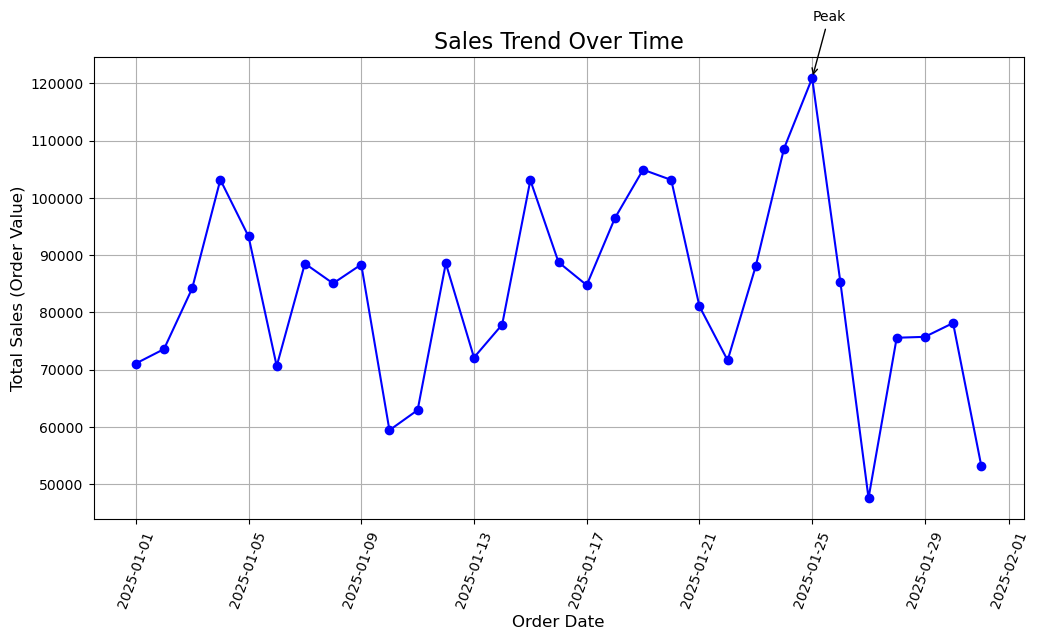

In [40]:

# Group by Order_Date and calculate total sales
sales_trend = df.groupby('Order_Date')['Order_Value'].sum().reset_index()

# Plot the sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sales_trend['Order_Date'], sales_trend['Order_Value'], marker='o', linestyle='-', color='b')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Total Sales (Order Value)', fontsize=12)
plt.xticks(rotation = 70)
plt.grid(True)

# Annotate the peak point 
peak_date = sales_trend.loc[sales_trend['Order_Value'].idxmax(), 'Order_Date']
peak_value = sales_trend['Order_Value'].max()
plt.annotate("Peak", xy = (peak_date,peak_value), xytext = (peak_date, peak_value +10000), arrowprops = dict(facecolor = 'red', arrowstyle = '->'))

plt.show()
    

In [ ]:
# Insights:
# Peak Sales Date: January 25, 2024.
# Maximum Order Value: ₹120,000, indicating a possible special event, high demand, or promotional campaign around that time.

In [20]:
#Analyzing the revenue from subscriptions (Zomato Gold)

# Filter dataset to include only Zomato Gold subscription data

df_gold = df[df['Subscription_Type'] == 'Zomato Gold']

df_gold

,Order_ID,Order_Date,Order_Value,Restaurant_ID,Restaurant_Name,Cuisine_Type,Restaurant_Rating,Delivery_Fee,Delivery_Partner_Payment,Subscription_Type,Customer_ID,Customer_Location,Quantity,Customer_Rating,Restaurant_Promotion
2,9879001,2025-01-07,3422,48407280,Bikanervala,Andhra Cuisine,4.2,58,35,Zomato Gold,34158502,Kukatpally,5,1,No
4,1462106,2025-01-04,2028,77872502,Sarvi Restaurant,Haleem,4.5,54,35,Zomato Gold,16635154,Kukatpally,4,2,No
10,3971969,2025-01-02,4739,80086389,Pista House,Haleem,3.0,135,88,Zomato Gold,61310662,Secunderabad,3,3,No
11,6761072,2025-01-19,4887,53370209,Bikanervala,Irani Chai,4.8,61,32,Zomato Gold,64002671,Ameerpet,2,2,Yes
12,6573864,2025-01-25,2449,77356258,Sarvi Restaurant,Chinese,5.0,127,57,Zomato Gold,77127479,Banjara Hills,2,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,3781277,2025-01-09,1627,25753104,Bikanervala,Haleem,3.8,94,77,Zomato Gold,98231878,Madhapur,3,5,Yes
987,7153086,2025-01-30,3229,22050921,Paradise,North Indian,3.9,146,45,Zomato Gold,61167934,Gachibowli,2,1,No
989,8920461,2025-01-19,4874,64348077,Bawarchi,Mughlai,2.7,51,57,Zomato Gold,74432815,Banjara Hills,3,4,Yes
993,2765716,2025-01-16,3647,19358733,Bawarchi,Hyderabadi Biryani,4.0,102,84,Zomato Gold,14494217,Banjara Hills,4,2,Yes


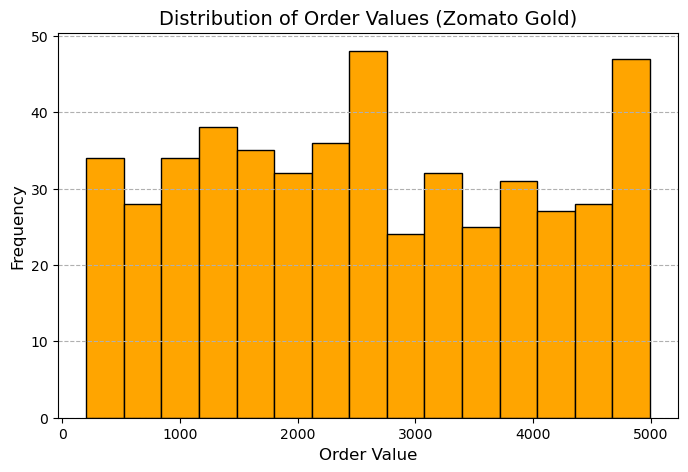

In [21]:
import matplotlib.pyplot as plt

# Plot histogram for Order_Value
plt.figure(figsize=(8, 5))
plt.hist(df_gold['Order_Value'], bins=15, color='orange', edgecolor='black')
plt.title('Distribution of Order Values (Zomato Gold)', fontsize=14)
plt.xlabel('Order Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


In [ ]:
# Insights:
# Majority of Orders: Zomato Gold users typically place orders in the 1000–2000 range and peak at 2000 - 3000 range for about 50 orders.

In [89]:
# Calculate total revenue from orders per restaurant
revenue_per_restaurant = df.groupby('Restaurant_Name')['Order_Value'].sum().reset_index()

# Calculate total delivery fee per restaurant
delivery_fee_per_restaurant = df.groupby('Restaurant_Name')['Delivery_Fee'].sum().reset_index()

# Merge the two dataframes to compare
revenue_delivery = pd.merge(revenue_per_restaurant, delivery_fee_per_restaurant, on='Restaurant_Name')

# Calculate the percentage of revenue from delivery fee for each restaurant
revenue_delivery['Delivery_Percentage'] = (revenue_delivery['Delivery_Fee'] / revenue_delivery['Order_Value']) * 100

# Show the top restaurants with the highest delivery percentage
revenue_delivery_sorted = revenue_delivery.sort_values(by='Delivery_Percentage', ascending=False)
revenue_delivery_sorted.head()


,Restaurant_Name,Order_Value,Delivery_Fee,Delivery_Percentage
3,Minerva Coffee Shops,335752,12515,3.727454
0,Bawarchi,350298,13038,3.721974
5,Pista House,286378,10536,3.679054
2,Hotel Shadab,320436,11518,3.594478
1,Chutneys,325996,11417,3.502190


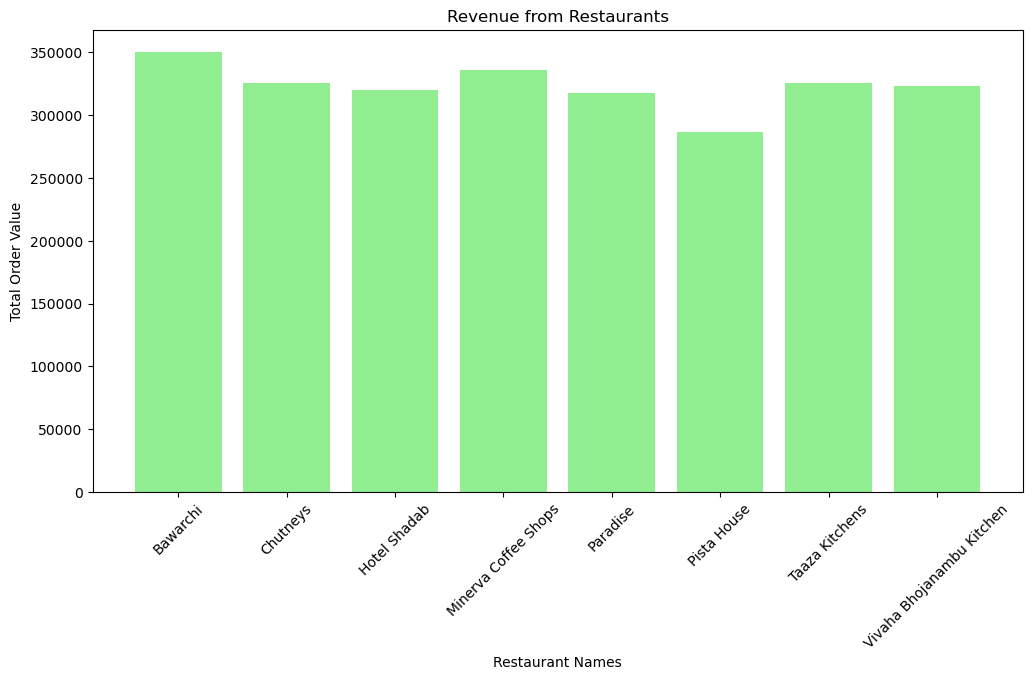

In [134]:
#Visualizing the revenue per Restaurant

plt.figure(figsize = (12,6))
plt.bar(revenue_per_restaurant['Restaurant_Name'], revenue_per_restaurant['Order_Value'], color = 'lightgreen')
plt.title("Revenue from Restaurants")
plt.xlabel("Restaurant Names")
plt.ylabel("Total Order Value")
plt.xticks(rotation = 45)
plt.show()

In [17]:
# Analyze Main Revenue Sources

# We want to identify the primary streams of revenue for Zomato. Revenue sources typically include:

# Order Value (Revenue from customers).
# Subscription Revenue (Zomato Gold).
# Restaurant Promotions (Revenue from restaurants for promotions).
# Delivery Fee (Revenue from delivery charges)

#Filtering Data for Analysis

#Calcultae the revenue from each stream 

revenue_sources = pd.DataFrame({
    'Source': ['Order Value', 'Subscription', 'Restaurant Promotions', 'Delivery Fee'],
    'Revenue': [
        df['Order_Value'].sum(),  # Total order value
        df.loc[df['Subscription_Type'] == 'Zomato Gold', 'Order_Value'].sum(),  # Subscription revenue
        df.loc[df['Restaurant_Promotion'] == 'Yes', 'Order_Value'].sum(),  # Promotions revenue
        df['Delivery_Fee'].sum() ]}) # Delivery fees 
revenue_sources

,Source,Revenue
0,Order Value,2585713
1,Subscription,1294037
2,Restaurant Promotions,1309997
3,Delivery Fee,91488


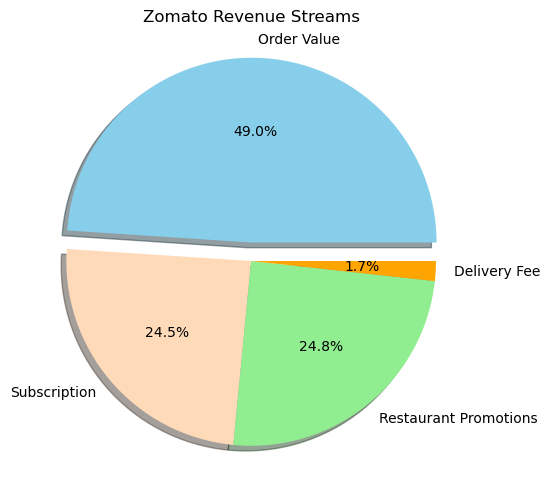

In [18]:
#Visualizing Revenue Streams by using pie chart

plt.figure(figsize = (12,6))
plt.pie(revenue_sources['Revenue'], labels = revenue_sources['Source'], autopct = '%1.1f%%', 
        colors = ['skyblue', 'peachpuff', 'lightgreen', 'orange'], shadow = True, explode = (0.1, 0,0,0))
plt.title("Zomato Revenue Streams")
plt.show()


In [ ]:
Order Value (49%):
This is the main source of revenue, nearly half of Zomato's earnings. It represents the total value of orders placed by customers.

Insight: Zomato heavily depends on customers' orders for its revenue, suggesting that strategies to boost order volume, like promotions, discounts, or improved delivery times, can further drive revenue.
Delivery Fee (1.7%):
A very small fraction of revenue comes from delivery charges.

Insight: Zomato might keep delivery fees low to remain competitive. However, this revenue stream could be increased by introducing dynamic delivery pricing or premium delivery options.
Restaurant Promotion (24.8%):
Almost a quarter of Zomato's revenue comes from restaurants paying for promotional services like ads or better visibility on the platform.

Insight: Restaurants are willing to invest in Zomato to boost their sales, making this a critical business area. Zomato can innovate more advertising options, like tailored campaigns or higher placement tiers, to increase this revenue stream.
Subscription (24.5%):
Subscription-based earnings, like Zomato Gold or Pro, contribute significantly to the revenue.

Insight: This indicates customers are willing to pay for benefits like discounts or free delivery. Zomato can explore expanding subscription perks, creating premium subscription tiers, or targeting specific customer groups for upselling.
This breakdown highlights the importance of maintaining a balance between customer satisfaction, restaurant collaboration, and competitive pricing strategies to ensure steady growth.


In [30]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Number of records
num_records = 500

# Generate sample data
data = {
    'Order_ID': range(1, num_records + 1),
    'Order_Date': pd.date_range(start='2024-01-01', periods=num_records).strftime('%Y-%m-%d'),
    'Order_Value': np.random.randint(100, 5000, num_records),
    'Restaurant_ID': np.random.randint(1, 51, num_records),
    'Restaurant_Name': np.random.choice(
        ['Minerva Coffee Shop', 'Taaza Kitchens', 'Dominos', 'KFC', 'Pizza Hut', 'Barbeque Nation'], num_records
    ),
    'Cuisine_Type': np.random.choice(
        ['Indian', 'Chinese', 'Italian', 'Continental', 'Mexican', 'Thai'], num_records
    ),
    'Restaurant_Rating': np.round(np.random.uniform(2.5, 5.0, num_records), 1),
    'Delivery_Fee': np.random.randint(10, 150, num_records),
    'Delivery_Partner_Payment': np.random.randint(30, 100, num_records),
    'Subscription_Type': np.random.choice(['Gold', 'Pro', 'None'], num_records),
    'Customer_ID': np.random.randint(1001, 1501, num_records),
    'Customer_Location': np.random.choice(
        ['Hyderabad', 'Bangalore', 'Mumbai', 'Delhi', 'Chennai', 'Pune'], num_records
    ),
    'Quantity': np.random.randint(1, 5, num_records),
    'Customer_Rating': np.round(np.random.uniform(1.0, 5.0, num_records), 1),
    'Restaurant_Promotion': np.random.choice(['Yes', 'No'], num_records, p=[0.7, 0.3]),
    'Adjusted_Order_Value': np.nan  # Placeholder for adjusted values
}

# Create DataFrame
zomato_df = pd.DataFrame(data)

# Calculate Adjusted_Order_Value
zomato_df['Adjusted_Order_Value'] = zomato_df['Order_Value'] + zomato_df['Delivery_Fee']

# Save the data
zomato_df.to_csv('zomato_promotions_data.csv', index=False)

# Check the distribution of Restaurant_Promotion
promotion_distribution = zomato_df['Restaurant_Promotion'].value_counts(normalize=True) * 100
print("Promotion Distribution (%):")
print(promotion_distribution)

# View the first few rows
zomato_df.head()


Promotion Distribution (%):
Restaurant_Promotion
Yes    70.0
No     30.0
Name: proportion, dtype: float64


,Order_ID,Order_Date,Order_Value,Restaurant_ID,Restaurant_Name,Cuisine_Type,Restaurant_Rating,Delivery_Fee,Delivery_Partner_Payment,Subscription_Type,Customer_ID,Customer_Location,Quantity,Customer_Rating,Restaurant_Promotion,Adjusted_Order_Value
0,1,2024-01-01,960,43,Dominos,Italian,4.3,130,53,None,1490,Pune,3,3.2,No,1090
1,2,2024-01-02,3872,11,Barbeque Nation,Continental,3.6,29,67,None,1209,Bangalore,3,1.9,Yes,3901
2,3,2024-01-03,3192,18,Barbeque Nation,Thai,4.7,84,57,Gold,1073,Bangalore,2,1.8,Yes,3276
3,4,2024-01-04,566,47,Dominos,Thai,3.9,79,50,None,1390,Mumbai,4,2.2,Yes,645
4,5,2024-01-05,4526,12,Dominos,Italian,3.8,65,83,Pro,1107,Hyderabad,4,4.6,Yes,4591


Promotion Participation Counts: Restaurant_Promotion
Yes    350
No     150
Name: count, dtype: int64

Promotion Participation Percentage: Restaurant_Promotion
Yes    70.0
No     30.0
Name: proportion, dtype: float64


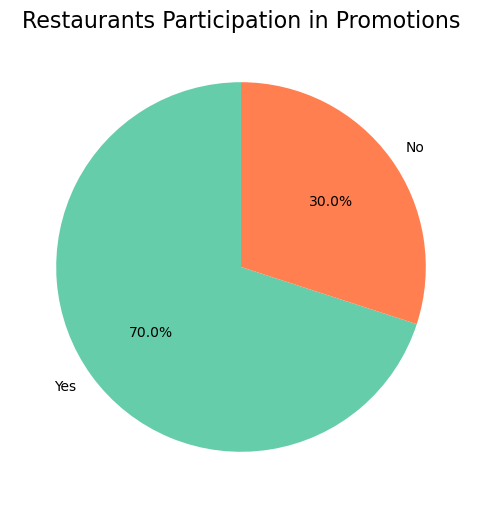

In [29]:
import matplotlib.pyplot as plt

# Analyze Restaurant Promotion Participation
# Are restaurants actively interested in using Zomato's platform to boost their online presence?

promotion_counts = zomato_df['Restaurant_Promotion'].value_counts()
promotion_percentage = zomato_df['Restaurant_Promotion'].value_counts(normalize = True) * 100

# Print summary
print("Promotion Participation Counts:", promotion_counts)

print("\nPromotion Participation Percentage:", promotion_percentage)


# Visualization: Pie Chart for Restaurant Promotion Participation
plt.figure(figsize=(8, 6))
colors = ['mediumaquamarine', 'coral']  
plt.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Restaurants Participation in Promotions', fontsize=16)
plt.show()



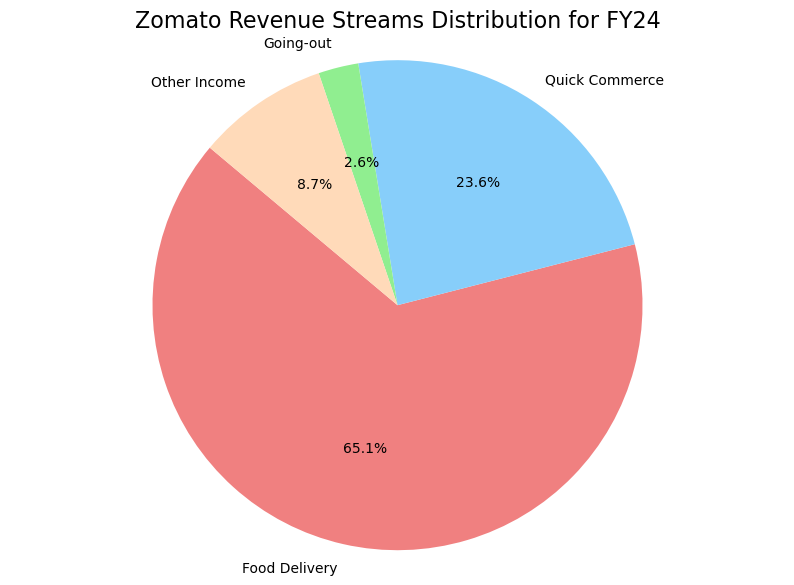

  Business_Segment  FY23_Revenue  YoY_Growth  FY24_Revenue
0    Food Delivery          4533        0.40       6346.20
1   Quick Commerce          1063        1.16       2296.08
2        Going-out           171        0.51        258.21
3     Other Income           682        0.24        845.68


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure for your data, replacing actual values where necessary
df = pd.DataFrame({
    'Business_Segment': ['Food Delivery', 'Quick Commerce', 'Going-out', 'Other Income'],
    'FY23_Revenue': [4533, 1063, 171, 682],  # Revenue in INR Crores for FY23
    'YoY_Growth': [0.40, 1.16, 0.51, 0.24],  # YoY Growth
})

# Calculate FY24 Revenue based on YoY growth
df['FY24_Revenue'] = df['FY23_Revenue'] * (1 + df['YoY_Growth'])

# Add these segments to the total revenue calculation
df['Total_Revenue'] = df['FY24_Revenue'].sum()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(df['FY24_Revenue'], labels=df['Business_Segment'], autopct='%1.1f%%', startangle=140,
        colors=['lightcoral', 'lightskyblue', 'lightgreen', 'peachpuff'])
plt.title('Zomato Revenue Streams Distribution for FY24', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

# Display the DataFrame with updated FY24 revenue data
print(df[['Business_Segment', 'FY23_Revenue', 'YoY_Growth', 'FY24_Revenue']])
